In [1]:
import data

import pandas as pd
#import geopandas
#from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [2]:
def getData(limit):
    client = Socrata("data.cityofnewyork.us", None)
    results = client.get("2yzn-sicd", limit = limit)
    results_df = pd.DataFrame.from_records(results)
    return results_df

In [3]:
taxi = getData(200)

In [4]:
taxi

,dropoff_datetime,dropoff_latitude,dropoff_longitude,extra,fare_amount,mta_tax,passenger_count,payment_type,pickup_datetime,pickup_latitude,pickup_longitude,rate_code,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,trip_distance,vendor_id
0,2015-04-15T12:08:50.000,40.765708923339844,-73.954521179199219,0,6,0.5,5,2,2015-04-15T12:03:43.000,40.7593994140625,-73.965347290039063,1,N,0,0,6.8,0.91,2
1,2015-05-10T18:45:25.000,40.731090545654297,-73.999748229980469,0,12.5,0.5,1,1,2015-05-10T18:28:41.000,40.759693145751953,-73.983749389648438,1,N,2.66,0,15.96,2.27,2
2,2015-06-17T07:55:32.000,40.715000152587891,-74.013671875,0,9,0.5,1,1,2015-06-17T07:45:29.000,40.732814788818359,-74.006317138671875,1,N,1.96,0,11.76,1.4,1
3,2015-04-17T10:55:23.000,40.727031707763672,-74.004241943359375,0,7,0.5,1,1,2015-04-17T10:47:00.000,40.724403381347656,-73.990814208984375,1,N,1,0,8.8,0.9,2
4,2015-05-17T05:19:21.000,40.752601623535156,-73.993156433105469,0.5,7.5,0.5,1,2,2015-05-17T05:12:12.000,40.738071441650391,-74.009559631347656,1,N,0,0,8.8,1.45,2
5,2015-02-21T23:38:50.000,40.749027252197266,-73.97039794921875,0.5,9,0.5,1,1,2015-02-21T23:29:44.000,40.7294921875,-73.97802734375,1,N,2.06,0,12.36,2.1,1
6,2015-03-11T22:35:28.000,40.779281616210938,-73.957771301269531,0.5,13,0.5,1,1,2015-03-11T22:20:03.000,40.755619049072266,-73.987350463867188,1,N,2.3,0,16.6,2.9,2
7,2015-02-06T19:30:25.000,40.718887329101563,-73.984352111816406,1,8.5,0.5,3,1,2015-02-06T19:20:02.000,40.731147766113281,-73.983970642089844,1,N,2.38,0,12.68,1.46,2
8,2015-01-10T23:54:09.000,40.69354248046875,-73.934120178222656,0.5,25.5,0.5,6,3,2015-01-10T23:27:51.000,40.754878997802734,-73.965370178222656,1,N,0,0,26.8,7.5,1
9,2015-03-25T12:57:58.000,40.769233703613281,-73.955032348632813,0,11,0.5,1,2,2015-03-25T12:40:57.000,40.756984710693359,-73.961105346679688,1,N,0,0,11.8,1,1


In [5]:
coordinates = taxi[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]

In [6]:
coordinates.head()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,40.7593994140625,-73.965347290039063,40.765708923339844,-73.954521179199219
1,40.759693145751953,-73.983749389648438,40.731090545654297,-73.999748229980469
2,40.732814788818359,-74.006317138671875,40.715000152587891,-74.013671875
3,40.724403381347656,-73.990814208984375,40.727031707763672,-74.004241943359375
4,40.738071441650391,-74.009559631347656,40.752601623535156,-73.993156433105469


In [7]:
lol=coordinates[:1000]
pickup=lol.drop(["dropoff_longitude","dropoff_latitude"],axis=1)
dropoff=lol.drop(["pickup_longitude","pickup_latitude"],axis=1)

In [8]:
tuples=pickup.itertuples(index=False)
pickup_tuples=np.array(list(tuples))
tuples=dropoff.itertuples(index=False)
dropoff_tuples=np.array(list(tuples))

In [9]:
pickup_list=[]
for i in range(len(pickup_tuples)):
    a=(pickup_tuples[i,0],pickup_tuples[i,1])
    pickup_list.append(a)
dropoff_list=[]
for i in range(len(dropoff_tuples)):
    a=(dropoff_tuples[i,0],pickup_tuples[i,1])
    dropoff_list.append(a)
#print(tuple_list)

In [10]:
mapp={}
for i in range(len(pickup_list)):
    mapp.update({pickup_list[i]:dropoff_list[i]})

In [11]:
g=nx.Graph()

In [12]:
for i in range(len(pickup_list)):
    g.add_node(pickup_list[i])
for i in range(len(dropoff_list)):
    g.add_node(dropoff_list[i])

In [13]:
for i in range(len(mapp)):
    g.add_edge(pickup_list[i],dropoff_list[i])

/home/johny/study/network-analysis/project/venv/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


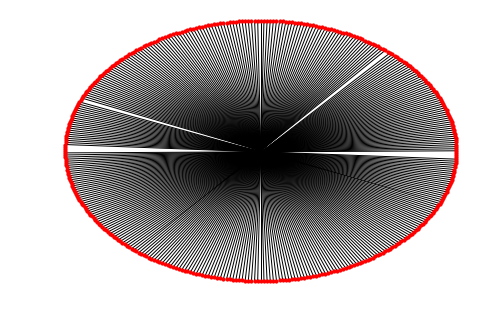

In [14]:
nx.draw_circular(g, node_size = 10)